# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [167]:
#!pip install openpyxl

import pandas as pd
import openpyxl

df_serviços = pd.read_excel("C:\\Users\\negri\\OneDrive\\Documentos\\GitHub\\Hashtag_AnaliseDados\\Python\\Cursos\\Curso Hashtag\\07_Pandas Exercício\\BaseServiçosPrestados.xlsx")
df_cliente = pd.read_csv('C:\\Users\\negri\\OneDrive\\Documentos\\GitHub\\Hashtag_AnaliseDados\\Python\\Cursos\\Curso Hashtag\\07_Pandas Exercício\\CadastroClientes.csv', sep=';', decimal=',')
df_funcionarios = pd.read_csv('C:\\Users\\negri\\OneDrive\\Documentos\\GitHub\\Hashtag_AnaliseDados\\Python\\Cursos\\Curso Hashtag\\07_Pandas Exercício\\CadastroFuncionarios.csv', sep=';', decimal = ',')

In [169]:
df_func_ajust =  df_funcionarios.copy()

#df_func_ajust['Impostos'] = df_func_ajust['Impostos'].str.replace(',','.')
#df_func_ajust['Beneficios'] = df_func_ajust['Beneficios'].str.replace(',','.')

df_func_ajust['Salario Base'] = pd.to_numeric(df_func_ajust['Salario Base']).fillna(0)
df_func_ajust['Impostos'] = pd.to_numeric(df_func_ajust['Impostos'], errors='coerce').fillna(0)
df_func_ajust['Beneficios'] = pd.to_numeric(df_func_ajust['Beneficios'], errors='coerce').fillna(0)

In [156]:
#display(df_funcionarios)

In [158]:
#display(df_func_ajust)

In [170]:
df_func_ajust['Folha Salarial'] = df_func_ajust['Salario Base'] + df_func_ajust['Impostos'] + df_func_ajust['Beneficios'] + df_func_ajust['VR'] + df_func_ajust['VT']
display(df_func_ajust)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area,Folha Salarial
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações,38208.04
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística,9915.36
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo,28195.32
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo,36962.66
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo,9568.36
...,...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística,19104.18
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial,7875.92
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo,42616.32
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial,9605.88


In [171]:
resposta1 = df_func_ajust[['Nome Completo','Salario Base','Impostos','Beneficios', 'Folha Salarial']]
resposta1

,Nome Completo,Salario Base,Impostos,Beneficios,Folha Salarial
0,Gabriel Mesquita,21910,10955.0,4382.0,38208.04
1,João Haddad,5404,2702.0,1080.8,9915.36
2,Amanda Marques Ribeiro,16066,8033.0,3213.2,28195.32
3,Guilherme Nunez,21305,10652.5,4261.0,36962.66
4,Adelino Gomes,5098,2549.0,1019.6,9568.36
...,...,...,...,...,...
109,Renan Scharnhorst Ott,10793,5396.5,2158.6,19104.18
110,Lucas Brum Pereira,4048,2024.0,809.6,7875.92
111,Caio Stellet,24596,12298.0,4919.2,42616.32
112,Fernanda Rocha,5078,2539.0,1015.6,9605.88


In [172]:
resposta1_5 = df_func_ajust['Folha Salarial'].sum()
print(f'Custo Total da Folha Salarial dos Funcionários: R${resposta1_5:,.2f}')

Custo Total da Folha Salarial dos Funcionários: R$2,717,493.22


In [165]:
#display(df_serviços)

In [164]:
#display(df_cliente)

In [183]:
df_empresa = df_serviços.merge(df_cliente, how='inner', left_on='ID Cliente', right_on='ID Cliente')
df_empresa['Faturamento Servico'] = df_empresa['Tempo Total de Contrato (Meses)'] * df_empresa['Valor Contrato Mensal']
display(df_empresa)

resposta2 = df_empresa[['Codigo do Servico', 'Faturamento Servico']]
display(resposta2)

df_total_faturamento = df_empresa['Faturamento Servico'].sum()
print(f'Total Faturamento: R$ {df_total_faturamento:,.2f}')

média_faturamento = df_empresa['Faturamento Servico'].mean()
print(f'Média Faturamento: R$ {média_faturamento:,.2f}')

media_valor_mensal = df_empresa['Valor Contrato Mensal'].mean()
print(f'Média Contrato Mensal: R$ {media_valor_mensal:,.2f}')

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal,Faturamento Servico
0,OS0001,67,1,14,Teixeira Gonçalves,540,7560
1,OS0002,17,2,12,Souza Santos,1260,15120
2,OS0003,116,4,14,Santos Costa,2520,35280
3,OS0004,37,5,8,Do Monteiro,3510,28080
4,OS0005,130,6,8,Soares Lobo,2340,18720
...,...,...,...,...,...,...,...
232,OS0233,111,315,4,Americo Bomfim,1575,6300
233,OS0234,124,316,8,Manoel Costa,3690,29520
234,OS0235,72,317,6,Gomes Machado,2385,14310
235,OS0236,90,319,14,Pereira Fazenda,4185,58590


,Codigo do Servico,Faturamento Servico
0,OS0001,7560
1,OS0002,15120
2,OS0003,35280
3,OS0004,28080
4,OS0005,18720
...,...,...
232,OS0233,6300
233,OS0234,29520
234,OS0235,14310
235,OS0236,58590


Total Faturamento: R$ 5,519,160.00
Média Faturamento: R$ 23,287.59
Média Contrato Mensal: R$ 2,438.35


In [176]:
df_contratos = df_serviços.merge(df_func_ajust, how='left', left_on='ID Funcionário', right_on='ID Funcionário')

qtd_funcionarios = len(df_func_ajust['ID Funcionário'].unique())
qtd_funcionarios_contratos = len(df_serviços['ID Funcionário'].unique())

razao = (qtd_funcionarios_contratos/ qtd_funcionarios)*100
print(f"Percentual de Contratos pelo total de funcionários: {razao:.2f} %")

Percentual de Contratos pelo total de funcionários: 86.84 %


<Axes: title={'center': 'Quantidade de Contratos por Área'}, xlabel='Área', ylabel='Contratos'>

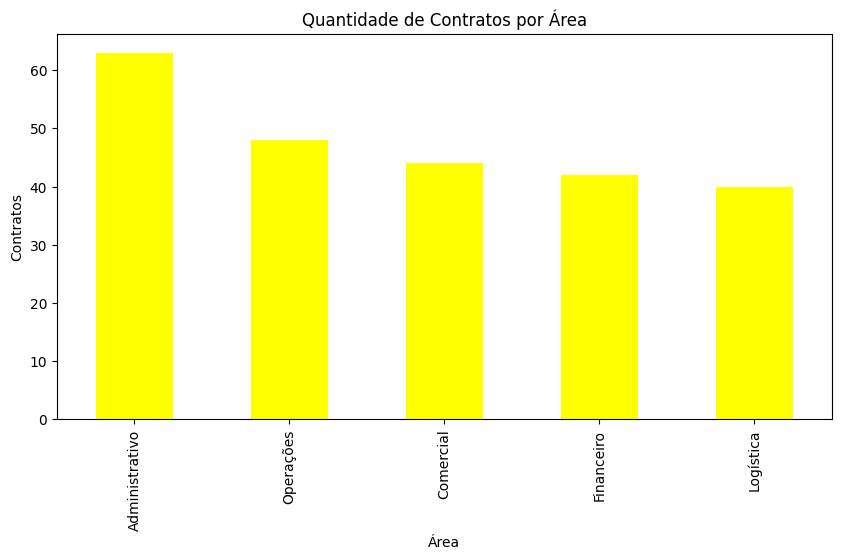

In [179]:
from turtle import title

from matplotlib import markers
from matplotlib.pyplot import xlabel, ylabel


df_contratos.groupby('Area')['Codigo do Servico'].count().sort_values(ascending=False).drop_duplicates().plot.bar(title="Quantidade de Contratos por Área", xlabel="Área", ylabel="Contratos", figsize=(10,5), color='Yellow')


<Axes: title={'center': 'Quantidade de Funcionários por Área'}, xlabel='Área', ylabel='Funcionários'>

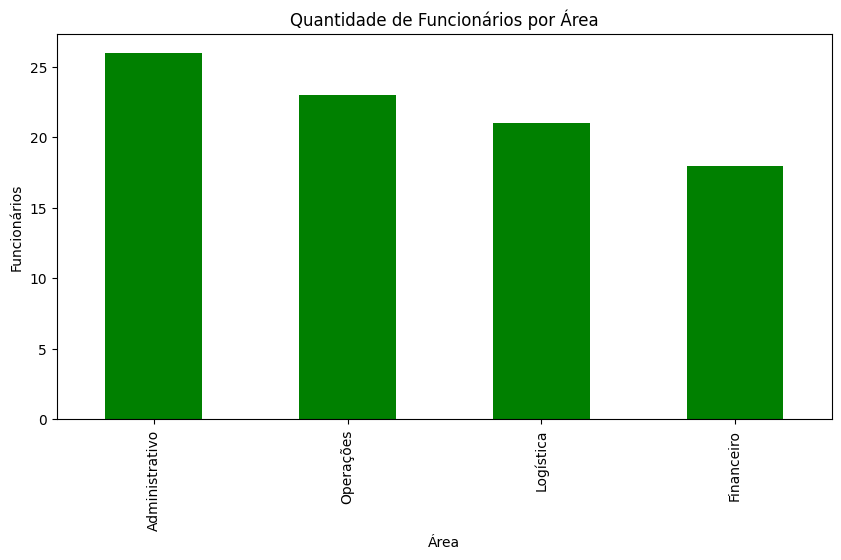

In [181]:
df_func_ajust.groupby('Area')['ID Funcionário'].count().sort_values(ascending=False).drop_duplicates().plot.bar(title="Quantidade de Funcionários por Área", xlabel="Área", ylabel="Funcionários", figsize=(10,5), color='Green')